In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\winequality-red.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
#The dataset is having 1599 rows and 12 columns

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#we see that there is no null values
#2> alll the predictors/features are float type
#3 > the Label is Quality and it is an integer as stated it varies between 0 and 10 leading to multiclassification

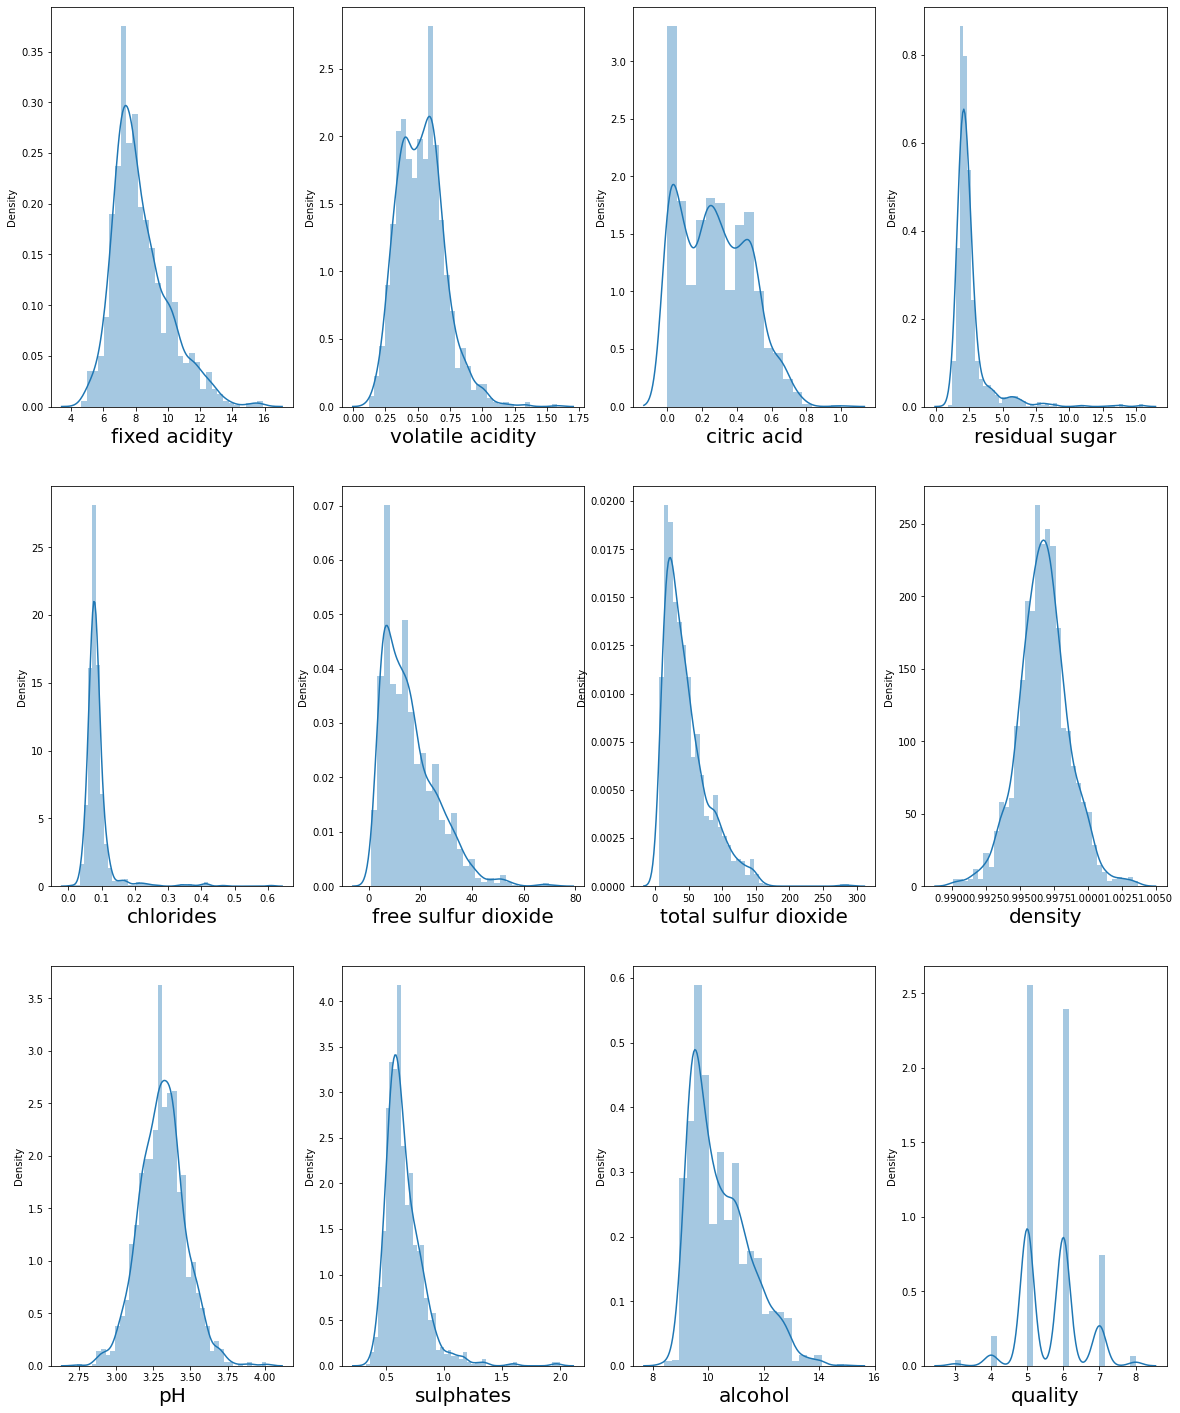

In [8]:
#Lets check how the data is distributed for every coulumn
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

<AxesSubplot:>

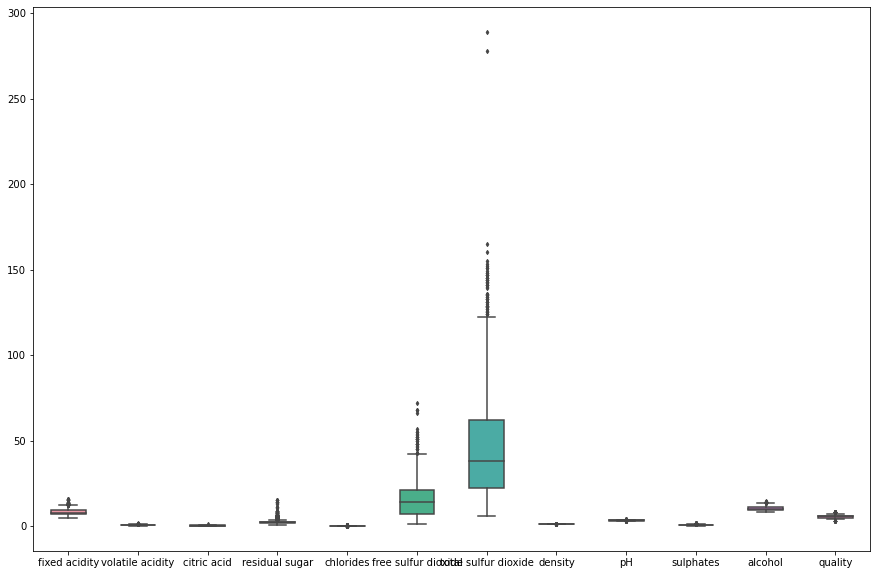

In [9]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width = 0.5,ax=ax,fliersize=3)

In [10]:
#We see some outliers present

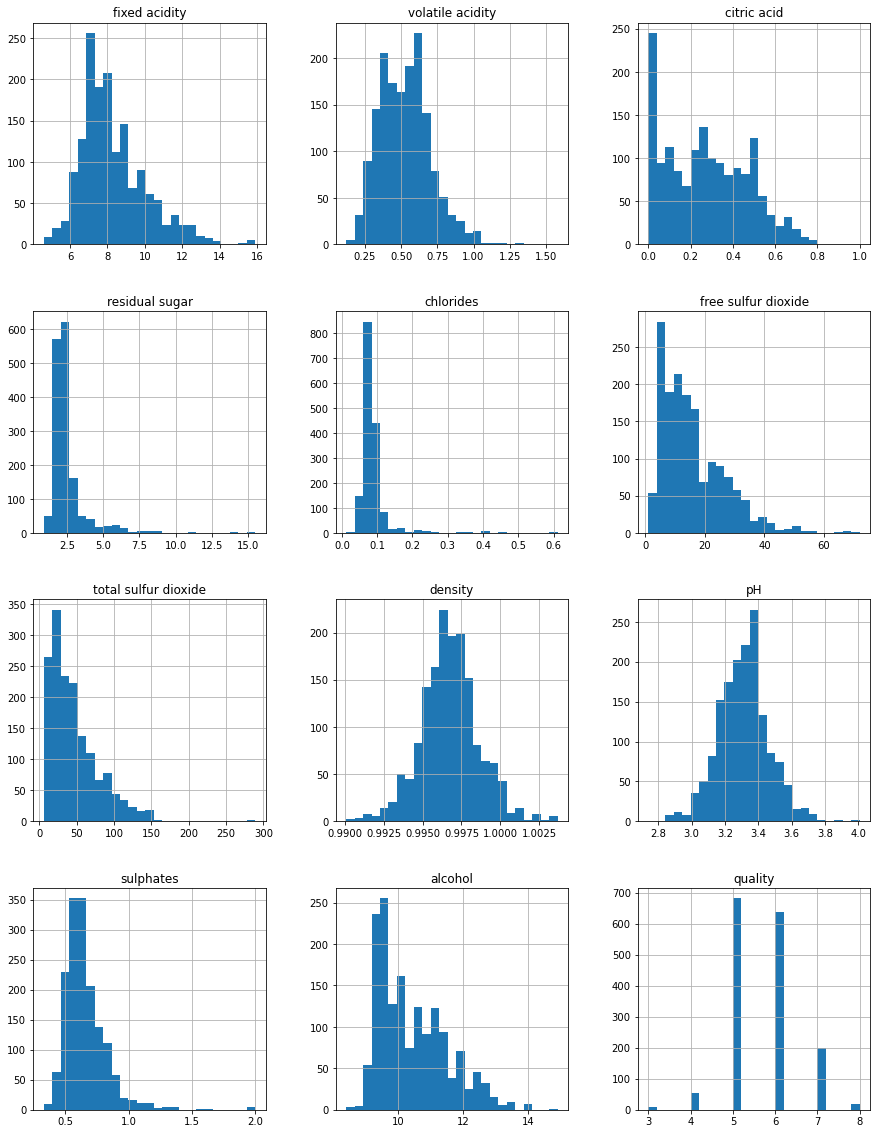

In [13]:
#Visualising the the feature on that of the label
data.hist(figsize=(15,20) , bins = 25)
plt.show()

Text(0, 0.5, 'alcohol')

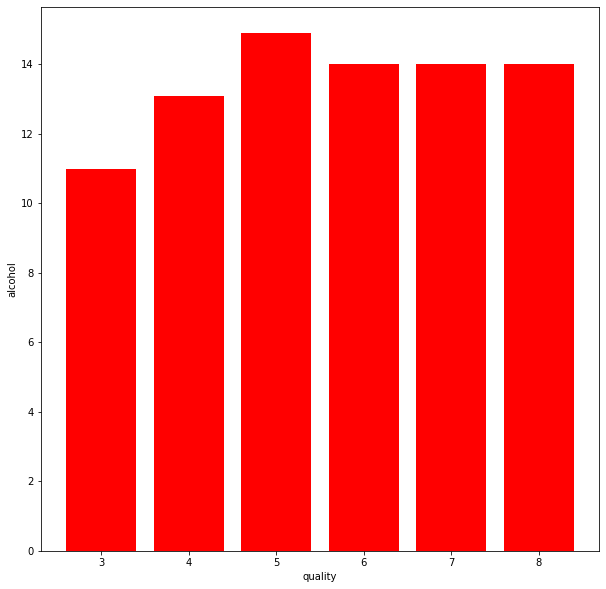

In [14]:
plt.figure(figsize=(10,10),facecolor='white')
plt.bar(data['quality'],data['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

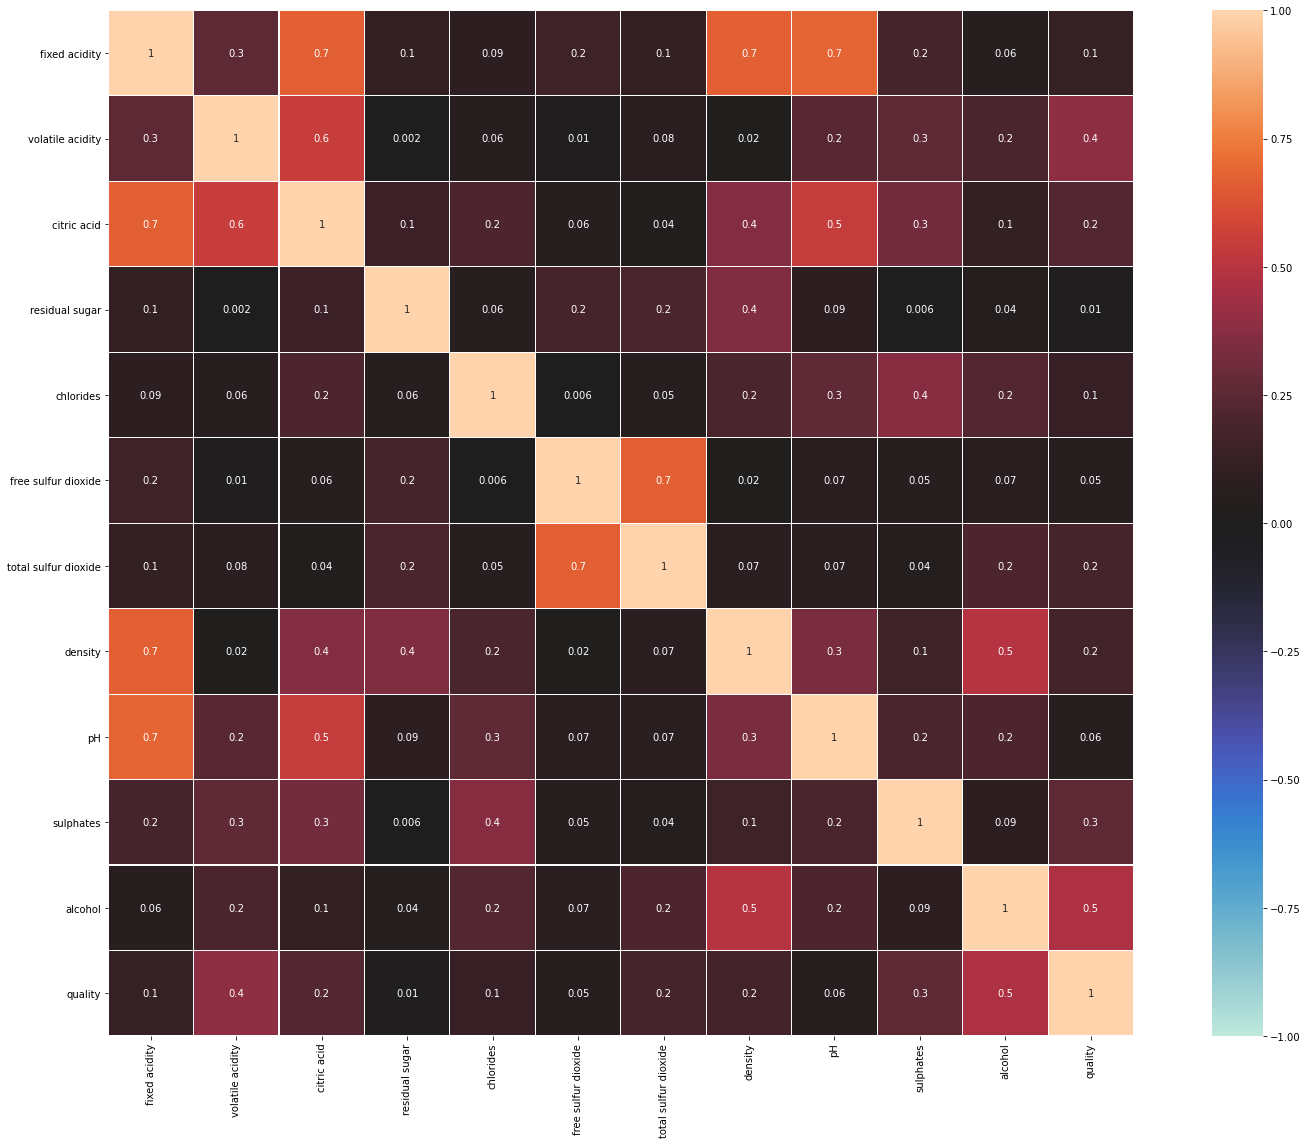

In [15]:
#Checking if there are any multicolliearity amongst the features i would use Heat Map here :

data_corr = data.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(data_corr , vmin=-1 , vmax=1 , annot=True,
            square=True , center=0 , fmt = '.1g' , linewidths=.1)
plt.tight_layout()

In [16]:
# I would like to create classification of target just like best and not good quality,if the quality score is greater than 7 best
#elze would reframe it to not good quality


data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]

#separate the feature and Label :
x = data.drop(['quality','goodquality'],axis=1)
y = data['goodquality']


In [17]:
#Let us see the data of best and bad wines

In [18]:
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [19]:
#We seee the data is not balanced there is a lot of difference.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=21)

# Random Forrest

In [25]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clf=RandomForestClassifier()

params = {'n_estimators' : [13,15],
         'criterion' : ['entropy'],
         'max_depth': [10,15],
         'min_samples_split' : [10,11],
         'min_samples_leaf' : [5,6]
         }
grd= GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params =>',grd.best_params_)

clf=grd.best_estimator_ #reinstantiating with best params

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print('conf_mat = >','\n',rf_conf_mat)
print('Accuracy rf Normal =====>',accuracy_score(y_test,y_pred))

best_params => {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}
conf_mat = > 
 [[334   5]
 [ 35  26]]
Accuracy rf Normal =====> 0.9


In [27]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       339
           1       0.84      0.43      0.57        61

    accuracy                           0.90       400
   macro avg       0.87      0.71      0.75       400
weighted avg       0.90      0.90      0.89       400



# Using KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8925

In [30]:
#Using bagging over KNN and see if the score improves
from sklearn.ensemble import BaggingClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators = 10, max_samples = 0.5,
                           bootstrap=True, random_state=3, oob_score=True)

In [31]:
#LEts check for the Out of Bag (OOB) score
bag_knn.oob_score

True

In [32]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.885

In [33]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators = 10, max_samples = 0.5,
                           bootstrap=False, random_state=3)

In [34]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.885

In [35]:
#Upon checking without Bagging itself the data looked good.

# Gradient BOOSTING CLASSIFIER :-

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [37]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 96.50%
------------------------
Classification report :
                      0           1  accuracy    macro avg  weighted avg
precision     0.963855    0.975000  0.964971     0.969428      0.965305
recall        0.997124    0.750000  0.964971     0.873562      0.964971
f1-score      0.980207    0.847826  0.964971     0.914017      0.962983
support    1043.000000  156.000000  0.964971  1199.000000   1199.000000
________________________________________
Confusion matrix : 
 [[1040    3]
 [  39  117]]


====================Test Result=========================
Accuracy score : 90.25%
------------------------
Classification report :
                      0           1  accuracy    macro avg  weighted avg
precision     0.963855    0.975000  0.964971     0.969428      0.965305
recall        0.997124    0.750000  0.964971     0.873562      0.964971
f1-score      0.980207    0.847826  0.964971     0.914017      0.962983
support    1043

In [38]:
#Tuning the data :
grid_param = {
    'max_depth' : range(4,12,2),
    'learning_rate' : np.arange(0.1,1,0.1),
    'min_samples_split' : range(4,8,2)
}

In [41]:
grid = GridSearchCV(gbdt_clf , param_grid = grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [40]:
grid.best_params_

{'learning_rate': 0.7000000000000001, 'max_depth': 10, 'min_samples_split': 4}

In [43]:
gbdt_clf = GradientBoostingClassifier(
    max_depth = 8,min_samples_split=4, learning_rate=0.4)
gbdt_clf.fit(x_train , y_train)
pred = gbdt_clf.predict(x_train)

In [44]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 96.50%
------------------------
Classification report :
                      0           1  accuracy    macro avg  weighted avg
precision     0.963855    0.975000  0.964971     0.969428      0.965305
recall        0.997124    0.750000  0.964971     0.873562      0.964971
f1-score      0.980207    0.847826  0.964971     0.914017      0.962983
support    1043.000000  156.000000  0.964971  1199.000000   1199.000000
________________________________________
Confusion matrix : 
 [[1040    3]
 [  39  117]]


====================Test Result=========================
Accuracy score : 90.25%
------------------------
Classification report :
                      0           1  accuracy    macro avg  weighted avg
precision     0.963855    0.975000  0.964971     0.969428      0.965305
recall        0.997124    0.750000  0.964971     0.873562      0.964971
f1-score      0.980207    0.847826  0.964971     0.914017      0.962983
support    1043

# Decisiion Tree

In [66]:
# from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       339
           1       0.58      0.62      0.60        61

    accuracy                           0.88       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.88      0.88      0.88       400



# Checking for the ROC

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [52]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [53]:
#Trainning with all classifiers

lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [54]:
#All models score captured
lr.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
print('All models score is captured ')

All models score is captured 


In [55]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.76983896706804

In [56]:
#Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.6603317375114851

In [57]:
#KNeighbors Classifier
roc_auc_score(y_test,kn.predict(x_test))

0.7214807292422263

In [58]:
#Decision Tree CLassifier
roc_auc_score(y_test,dt.predict(x_test))

0.7382126795299578

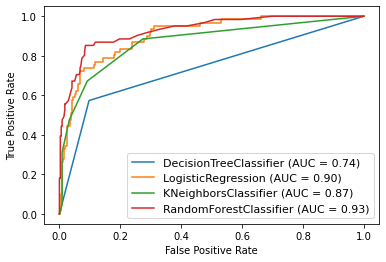

In [59]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)   #ax_ = Axies with confusion matrix
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()